In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import toeplitz
import scipy.stats
import math

#### Zadatak 1.1

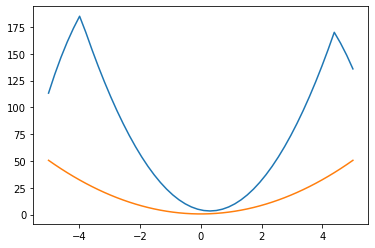

In [2]:
def f(x):
    return (x **2)
    
def g(x):
    if x >= -1 and x <= 1:
        return 1
    else :
        return 0
    
k = np.linspace(-5,5,50)
sum = []

for i in range(-25,25):
    sum_value = 0
    for j in range(-25,26):
        if ((i-j) >= -25 and (i-j) <= 25):
            sum_value = sum_value + f(k[(j+24)]) * g( k[ i - j + 24] )
            
    sum.append(sum_value)
    
plt.plot(k, sum)
plt.plot(k, 2 * k**2+2/3)

#### Poglavlje 1.2 - rješenje

In [3]:
H = np.zeros([51,51])
H[0,0]=1/2
H[1,0]=1/3
H[0,1]=1/3
H[0,2]=1/6
H[1,1]=1/2
H[1,2]=1/3
H[1,3]=1/6
H[49,49]=1/2
H[49,48]=1/3
H[49,47]=1/6
H[48,47]=1/3
H[48,46]=1/6
H[48,48]=1/2
H[48,49]=1/3
H[50,50]=1/2
H[50,49]=1/3
H[50,48]=1/6
H[48,50]=1/6
H[49,50]=1/3


for i in range(2, 48, 1):
    H[i,i] = 1/2
    H[i, i-1] = 1/3
    H[i, i+1] = 1/3
    H[i, i-2] = 1/6
    H[i, i+2] = 1/6
    

In [4]:
y = np. array([2.653325960901065539,
3.532583726207044972,
4.047079395076123909,
4.748270164729973430,
4.923033643388124325,
5.254796152609857884,
5.415239948303369744,
5.635928957692230234,
5.775950036285254718,
5.963332847144421578,
5.937711618844434547,
5.873028129660330166,
5.796733545303299984,
5.655221906901356732,
5.520679653548152821,
5.242466616289022774,
4.944678386634213219,
4.660135471386042560,
4.430436882726075609,
4.067933383622594157,
3.679592637410421752,
3.425865924720422395,
3.128004807851264335,
3.053152965345718783,
2.883164631809667089,
2.885249622716489437,
2.998314351657656029,
3.328750408205369382,
3.625548257493697246,
4.036113666971717251,
4.452049878992182741,
4.895122128570390529,
5.349094167907357367,
5.771034703394696486,
6.038988416342758292,
6.041009226081688332,
5.753617968087167078,
5.404205099540913437,
4.993659492355084772,
4.279307279983073364,
3.632040049883198396,
3.034428402921301782,
2.411528722644912026,
1.847815034706816961,
1.310127490955085072,
0.8642337888971122206,
0.5417949186276215245,
0.3063085832083232152,
0.3001789144038761736,
0.1528856973544774067,
0.08106276530384406986])

In [5]:
x_1 = np.dot(np.linalg.inv(H),y)

In [167]:
#drugi način - koristeći gotove pakete
column = H[:,0]
row = H[0,:]
#pd.DataFrame(toeplitz(row, column)) #zadamo prvi column i prvi row

In [6]:
x_2 = np.dot(np.linalg.inv(np.dot(np.transpose(H),H) + 0.1 * np.identity(51)), np.dot(np.transpose(H),y))
x_3 = np.dot(np.linalg.inv(np.dot(np.transpose(H),H) + 1 * np.identity(51)), np.dot(np.transpose(H),y))
x_4 = np.dot(np.linalg.inv(np.dot(np.transpose(H),H) + 10 * np.identity(51)), np.dot(np.transpose(H),y))

In [43]:
x_real = np.array([2.419707245282781027,
2.660852499350644607,
2.896915529001507839,
3.122539338755752514,
3.332246046855835697,
3.520653328401823767,
3.682701600765197369,
3.813878772867291378,
3.910428797116403565,
3.969530835805462399,
3.989437671209474345,
3.969565087761028011,
3.910528348275214228,
3.814127579318141947,
3.683290833710798573,
3.521991569900643881,
3.335165498175911125,
3.128658352968749945,
2.909237719299558211,
2.684693381002197121,
2.464025729310813873,
2.257676286155305689,
2.077690242168986234,
1.937631223426503180,
1.852020584819763727,
1.835085621790798704,
1.898709929803498619,
2.049699120563426735,
2.286776239366392627,
2.598018697578896141,
2.959616910323315420,
3.336751487419101103,
3.686991957380312268,
3.965971780449246253,
4.134372242702988309,
4.164705808950012411,
4.046256632091415284,
3.786910751177458678,
3.411400544747795305,
2.956440851812585091,
2.464025729310812096,
1.974528740394126292,
1.521115538372097120,
1.126434036185092413,
0.8018237746936713872,
0.5486364920823375568,
0.3608649477634514602,
0.2281931056539361347,
0.1387491615947707979,
0.08114107054372736438,
0.04565678637702892673])

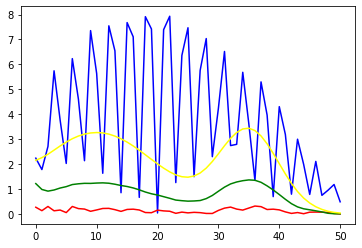

In [8]:
i = np.arange(0,51,1)
plt.plot(i, abs(x_1-x_real), color="blue") 
plt.plot(i, abs(x_2-x_real), color="red") 
plt.plot(i, abs(x_3-x_real), color="green")
plt.plot(i, abs(x_4-x_real), color = "yellow") 

#komentar: 

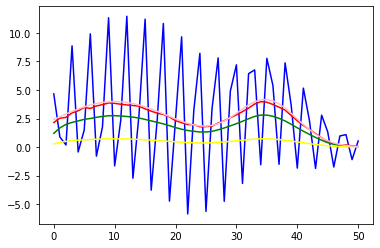

In [9]:
plt.plot(i, x_1, color="blue") 
plt.plot(i, x_2, color="red") 
plt.plot(i, x_3, color="green")
plt.plot(i, x_4, color = "yellow") 
plt.plot(i, x_real, color="pink") 

#Vidimo da kod x_1 sto je dobiven rjesavanjem linearnog sustava je najgori i ima velike oscilacije. Kod x_2 gdje je lambda najmanji
#vidimo da su oscilacije najmanje, a kod x_3 i x_4 vidimo da su glatke al vece su oscijalcije nego kod x_2
#Ovdje se isto lijepo vidi kako crvena linija (x_2 za lambda=0.1) lijepo prati rozu liniju (x_real)

#### Zadatak 1.10

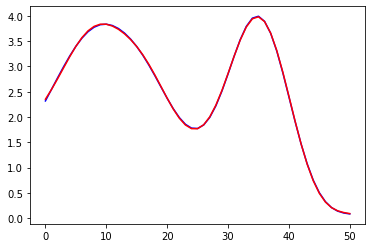

In [52]:
import numpy.linalg as la
import scipy.linalg as spla


y = np.array([3.261671620770699054,
3.805362024557123135,
4.403912213677347864,
4.596934754226060349,
5.360416441782283492,
5.721207436006098490,
5.788299419262402878,
6.167738694921077958,
6.384484476527370056,
6.375983280373931805,
6.495325918423458411,
6.779898174220048368,
6.698298272467149594,
6.347464305927680961,
6.273439202081561916,
6.077205047704572927,
5.790397390332184813,
5.624580765870946131,
5.505674230519672641,
5.068728399834481202,
4.866092357909408861,
4.881528128894776053,
4.745982645030536240,
4.635914106990071559,
4.336927856317315921,
4.497779239551638497,
4.793543889658445245,
4.819125715493035145,
4.992352295358803538,
5.142269401467445711,
5.560492089222524470,
5.658220392596257753,
5.807134894841067485,
5.925140742056281162,
5.989597964881554049,
5.720574349237350198,
5.846787214257697762,
5.265735556635560144,
5.038427555759247944,
4.764525884147250423,
3.998214323047016627,
3.633998966522085539,
3.421210452193904850,
2.784834349537579801,
2.504925332479407629,
2.031076506135093052,
1.661245746239728760,
1.163261824374513420,
1.012201931295549473,
0.6703061826806112622,
0.5219907838710826642])

k = np.linspace(0,1,51)
H = toeplitz(scipy.stats.norm(0, 0.1).pdf(k), scipy.stats.norm(0, 0.1).pdf(k))
#Za R(x)=norma(x,2)
I=np.eye(51)
A1=np.concatenate((H,I))
U, S, Vt = la.svd(A1)
S_inv = np.zeros(A1.shape).T
S_inv[:51,:51] = np.diag(1/S[:51])
y_novi=np.concatenate((y,np.transpose(np.zeros(51))))
x_1= Vt.T.dot(S_inv).dot(U.T).dot(y_novi)
x_1

#Za R(x)=norm(delta(x),2)
#A= [H; delta], delta= na dijagonali 1, na donjoj sporednoj dijagonali -1 

for i in range(50):
    I[i+1,i]=-1;
A2= np.concatenate((H,I))
A2_inv=np.linalg.pinv(A2)
x_2=np.dot(A2_inv,y_novi);
x_2

i = np.arange(0,51,1)
plt.plot(i, abs(x_1-x_real), color="blue") 
plt.plot(i, abs(x_2-x_real), color="red") 



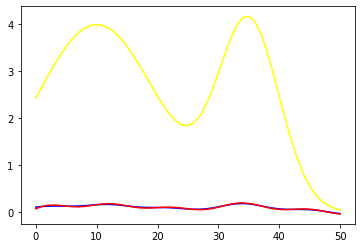

In [53]:
plt.plot(i, x_1, color="blue") 
plt.plot(i, x_2, color="red") 
plt.plot(i, x_real, color="yellow") 

In [22]:
y = np.array([0.8746373926315466063,
0.9771189752038055287,
1.154964905482697368,
1.275985472123294606,
1.292429447651504359,
1.352423523287939799,
1.341819573093383067,
1.314344095282914626,
1.367653503314279817,
1.181449930871748322,
1.167696548780323695,
1.105815836580788192,
1.126727003235285407,
1.147401448215457753,
1.029175449228701744,
0.9769618524669946291,
1.095998744489680599,
1.056726234394556485,
1.085992590814006453,
1.189703795596143365,
1.120674460494037517,
1.077096950299999190,
1.054527435396158896,
1.076713800193958459,
1.053716867545473557,
1.054334350973751055,
1.097566268779624377,
1.100809727554936890,
1.188510269233673089,
1.134966595762769703,
1.235257013845061591,
1.169918165170065638,
1.046292517538160327,
1.039480426248246658,
0.8734713820871584655,
0.7175353293365055452,
0.7256363498287080604,
0.6778273678375342781,
0.6451404415121220204,
0.5690022176870470627,
0.4920730758818061545,
0.5594108462678162308,
0.5879081450884257043,
0.6639582910582856323,
0.6220969344076809682,
0.8364193561561640289,
0.7989738371471613032,
0.8018367625152963418,
0.8283620091470995650,
0.8867758769046005796,
0.7987591431543492604])

k = np.linspace(0,1,51)
H = toeplitz(scipy.stats.norm(0, 0.1).pdf(k), scipy.stats.norm(0, 0.1).pdf(k))
#Za R(x)=norma(x,2)
I=np.eye(51)
A1=np.concatenate((H,I))
U, S, Vt = la.svd(A1)
S_inv = np.zeros(A1.shape).T
S_inv[:51,:51] = np.diag(1/S[:51])
x_2= Vt.T.dot(S_inv).dot(U[:51].T).dot(y)

In [21]:
y = np.array([5.055090752031555112,
4.722398032268523060,
4.484120061591367445,
4.036837939769460704,
3.719019312384420850,
3.273254265198379809,
3.120056251515226808,
3.033589927023597976,
2.821320296351906620,
3.037477397362846165,
2.939745044626588033,
3.119843628124065571,
3.569170087105939526,
3.944279885396877461,
4.493290956808310810,
5.029950141911393224,
5.488549594949517996,
5.938069758925236030,
5.898366158368537171,
5.952808146963012526,
5.849181057106771497,
5.480117515623220470,
4.957667707297821025,
4.495240022961812798,
3.668894585772715100,
3.144772601807774848,
2.458316775626596229,
2.006739840371278394,
1.251298959192808757,
0.8185010974477139323,
0.6681498041595613779,
0.2842168275457114257,
0.2835186399701757898,
0.1293284020486525909,
0.03830556086659424320])

k = [0.125,0.125,0.25,0.5,0.25,0.125,0.125]
H = toeplitz(scipy.stats.norm(0, 0.1).pdf(k), scipy.stats.norm(0, 0.1).pdf(k))
H.shape
#Za R(x)=norma(x,2)
I=np.eye(7)
A1=np.concatenate((H,I))
U, S, Vt = la.svd(A1)
S_inv = np.zeros(A1.shape).T
#x_3= Vt.T.dot(S_inv).dot(U[:7].T).dot(y)

#### Zadatak 1.11

In [11]:
signal1 = np.array([2.419707245282781027,
2.660852499350644607,
2.896915529001507839,
3.122539338755752514,
3.332246046855835697,
3.520653328401823767,
3.682701600765197369,
3.813878772867291378,
3.910428797116403565,
3.969530835805462399,
3.989437671209474345,
3.969565087761028011,
3.910528348275214228,
3.814127579318141947,
3.683290833710798573,
3.521991569900643881,
3.335165498175911125,
3.128658352968749945,
2.909237719299558211,
2.684693381002197121,
2.464025729310813873,
2.257676286155305689,
2.077690242168986234,
1.937631223426503180,
1.852020584819763727,
1.835085621790798704,
1.898709929803498619,
2.049699120563426735,
2.286776239366392627,
2.598018697578896141,
2.959616910323315420,
3.336751487419101103,
3.686991957380312268,
3.965971780449246253,
4.134372242702988309,
4.164705808950012411,
4.046256632091415284,
3.786910751177458678,
3.411400544747795305,
2.956440851812585091,
2.464025729310812096,
1.974528740394126292,
1.521115538372097120,
1.126434036185092413,
0.8018237746936713872,
0.5486364920823375568,
0.3608649477634514602,
0.2281931056539361347,
0.1387491615947707979,
0.08114107054372736438,
0.04565678637702892673])

noisy_signal1 = np.array([3.11899687240463841000,
4.25101076297996893800,
3.37840793781916026700,
4.16799274612148451500,
3.74892162584375610000,
4.78397466579557484300,
3.33039372935987509900,
4.31294644419548856000,
4.68065744711944464700,
4.11959189900950573100,
4.52572354007912736100,
3.28576672103508116200,
1.80660677330092367400,
4.03651924154197949700,
1.38555731986293428900,
2.73104642148978316000,
2.65556680927924926300,
3.62037803419483061900,
3.88273970387003597400,
2.48224052666085448500,
1.98311915799379012700,
4.60349006196965682100,
1.03108662693569597100,
0.8345586530659530045,
0.3635330743778337759,
2.25590109047708509100,
1.89648279429139154900,
2.10134812704856788200,
3.50085810202510083800,
2.77119626254686579600,
4.22303913731902280700,
2.89030383660799605700,
1.41431677811747436000,
3.77204737331431250200,
2.34282432688517605600,
5.10063496385840586800,
4.96483939698834664300,
3.82898504096623071300,
4.31145678165227952400,
3.36688815620930581600,
2.53310831264922908800,
1.43417304665053935200,
1.06158077434795905500,
1.76187985183332029800,
1.60339636103747929000,
1.22106999576972707900,
1.08635327350743260400,
0.3666243227051834142,
0.8284191951663535392,
-0.1586600705122934718,
3.64479489637211528900])

In [12]:
k_ = 5
k = 51
n = 51
y = noisy_signal1

V = np.zeros((k,k))
for i in range(k):
  for j in range(k):
    V[i,j] = math.cos( j * (2*i + 1)/(2*n) * math.pi)
    
    
alpha = np.dot(np.dot(np.linalg.inv(np.dot(V[:,0:k_].T, V[:,0:k_])), V[:, 0:k_].T), y.reshape(51,1))
first = np.dot(V[:, 0:k_], alpha)

In [13]:
k_ = 10
k = 51
n = 51
y = noisy_signal1

V = np.zeros((k,k))
for i in range(k):
  for j in range(k):
    V[i,j] = math.cos( j * (2*i + 1)/(2*n) * math.pi)
    
    
alpha = np.dot(np.dot(np.linalg.inv(np.dot(V[:,0:k_].T, V[:,0:k_])), V[:, 0:k_].T), y.reshape(51,1))
second = np.dot(V[:, 0:k_], alpha)

In [15]:
k_ = 20
k = 51
n = 51
y = noisy_signal1

V = np.zeros((k,k))
for i in range(k):
  for j in range(k):
    V[i,j] = math.cos( j * (2*i + 1)/(2*n) * math.pi)
    
    
alpha = np.dot(np.dot(np.linalg.inv(np.dot(V[:,0:k_].T, V[:,0:k_])), V[:, 0:k_].T), y.reshape(51,1))
third = np.dot(V[:, 0:k_], alpha)

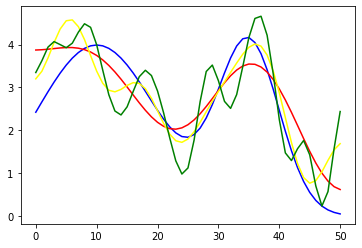

In [16]:
plt.plot(signal1, color = "blue")
plt.plot(first, color="red")
plt.plot(second, color = "yellow")
plt.plot(third, color = "green")